In [1]:
!pip install fsspec
!pip install s3fs
!pip install boto

import pandas as pd
import boto

# import the csv file directly from an s3 bucket
data = pd.read_csv('s3://articledatas3/CanonicalCorrelationAnalysisData.csv')

     |████████████████████████████████| 132 kB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 3.7 MB/s  eta 0:00:01
     |████████████████████████████████| 8.1 MB 60.0 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 10.2 MB/s eta 0:00:01
  Created wheel for aiobotocore: filename=aiobotocore-2.0.1-py3-none-any.whl size=51992 sha256=abc1790217502be16d87b37831b874c252b77db3961f9ff8f81890921a865a34
  Stored in directory: /home/jovyan/.cache/pip/wheels/56/cd/99/917ef1080ec8cc6f1c903f4622761689c3886bc49306855a0e
Successfully built aiobotocore
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2021.10.1
    Uninstalling fsspec-2021.10.1:
      Successfully uninstalled fsspec-2021.10.1
     |████████████████████████████████| 1.4 MB 4.8 MB/s eta 0:00:01


In [2]:
from sklearn.cross_decomposition import CCA

# Split the data in X and Y
X = data[['PsychTest1',	'PsychTest2', 'YrsEdu', 'IQ', 'HrsTrn', 'HrsWrk']]
Y = data[['ClientSat',	'SuperSat',	'ProjCompl']]

# Instantiate the Canonical Correlation Analysis with 2 components
my_cca = CCA(n_components=2)

# Fit the model
my_cca.fit(X, Y)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:46: DeprecationWarning: scipy.linalg.pinv2 is deprecated since SciPy 1.7.0, use scipy.linalg.pinv instead
  X_pinv = pinv2(X, check_finite=False)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:63: DeprecationWarning: scipy.linalg.pinv2 is deprecated since SciPy 1.7.0, use scipy.linalg.pinv instead
  Y_pinv = pinv2(Y, check_finite=False)  # compute once pinv(Y)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:46: DeprecationWarning: scipy.linalg.pinv2 is deprecated since SciPy 1.7.0, use scipy.linalg.pinv instead
  X_pinv = pinv2(X, check_finite=False)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:63: DeprecationWarning: scipy.linalg.pinv2 is deprecated since SciPy 1.7.0, use scipy.linalg.pinv instead
  Y_pinv = pinv2(Y, check_finite=False)  # compute once pinv(Y)
/srv/conda/e

CCA(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

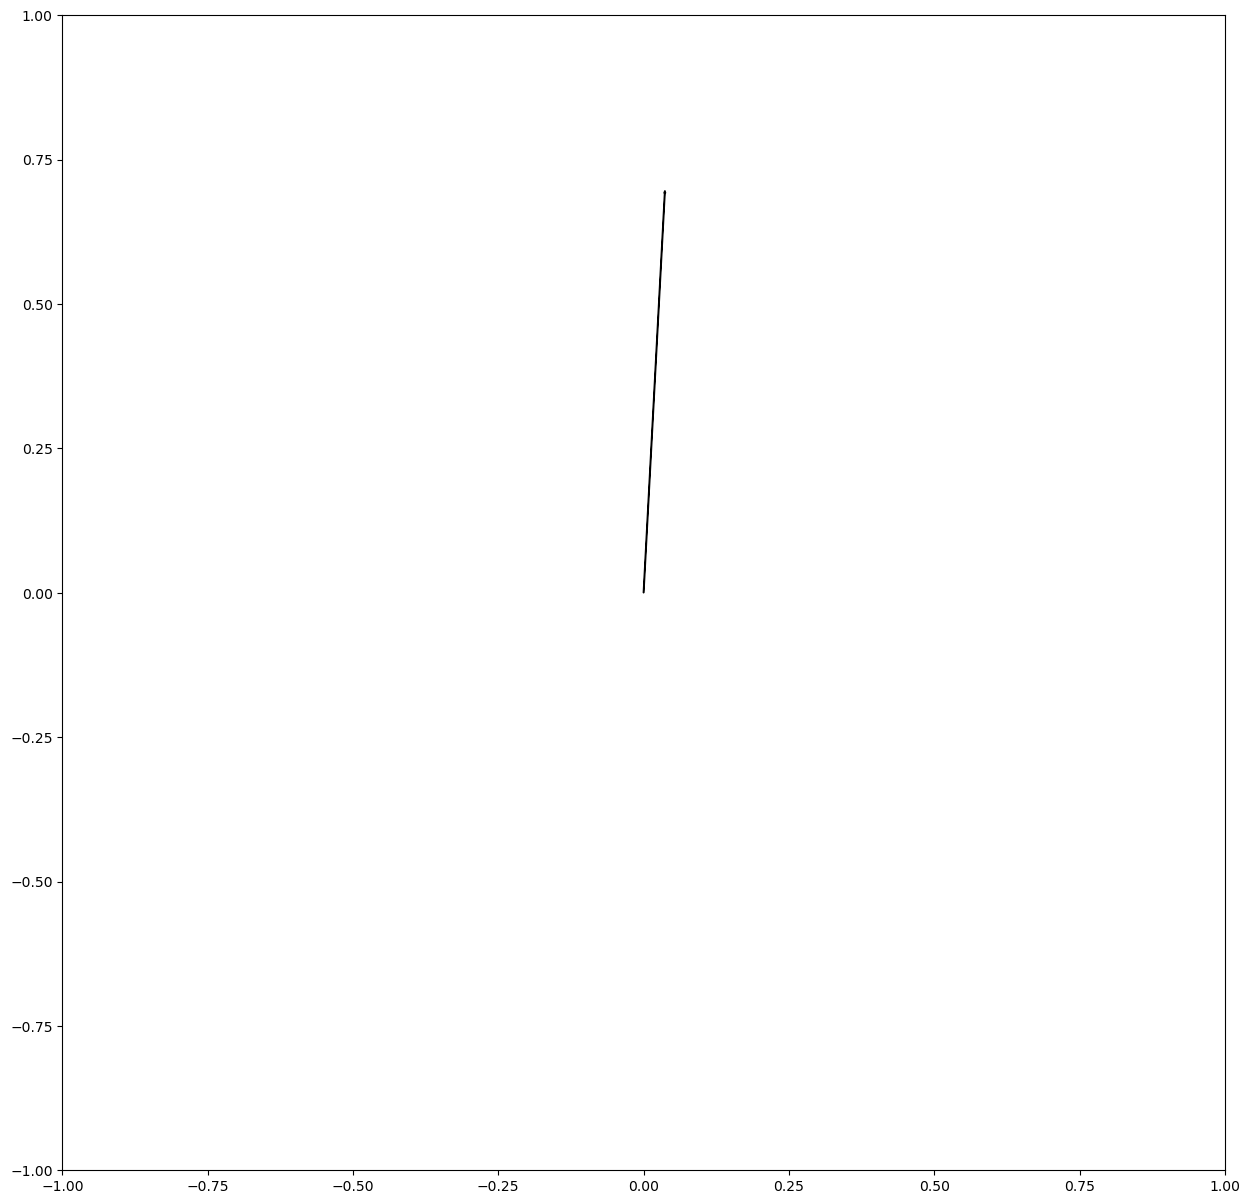

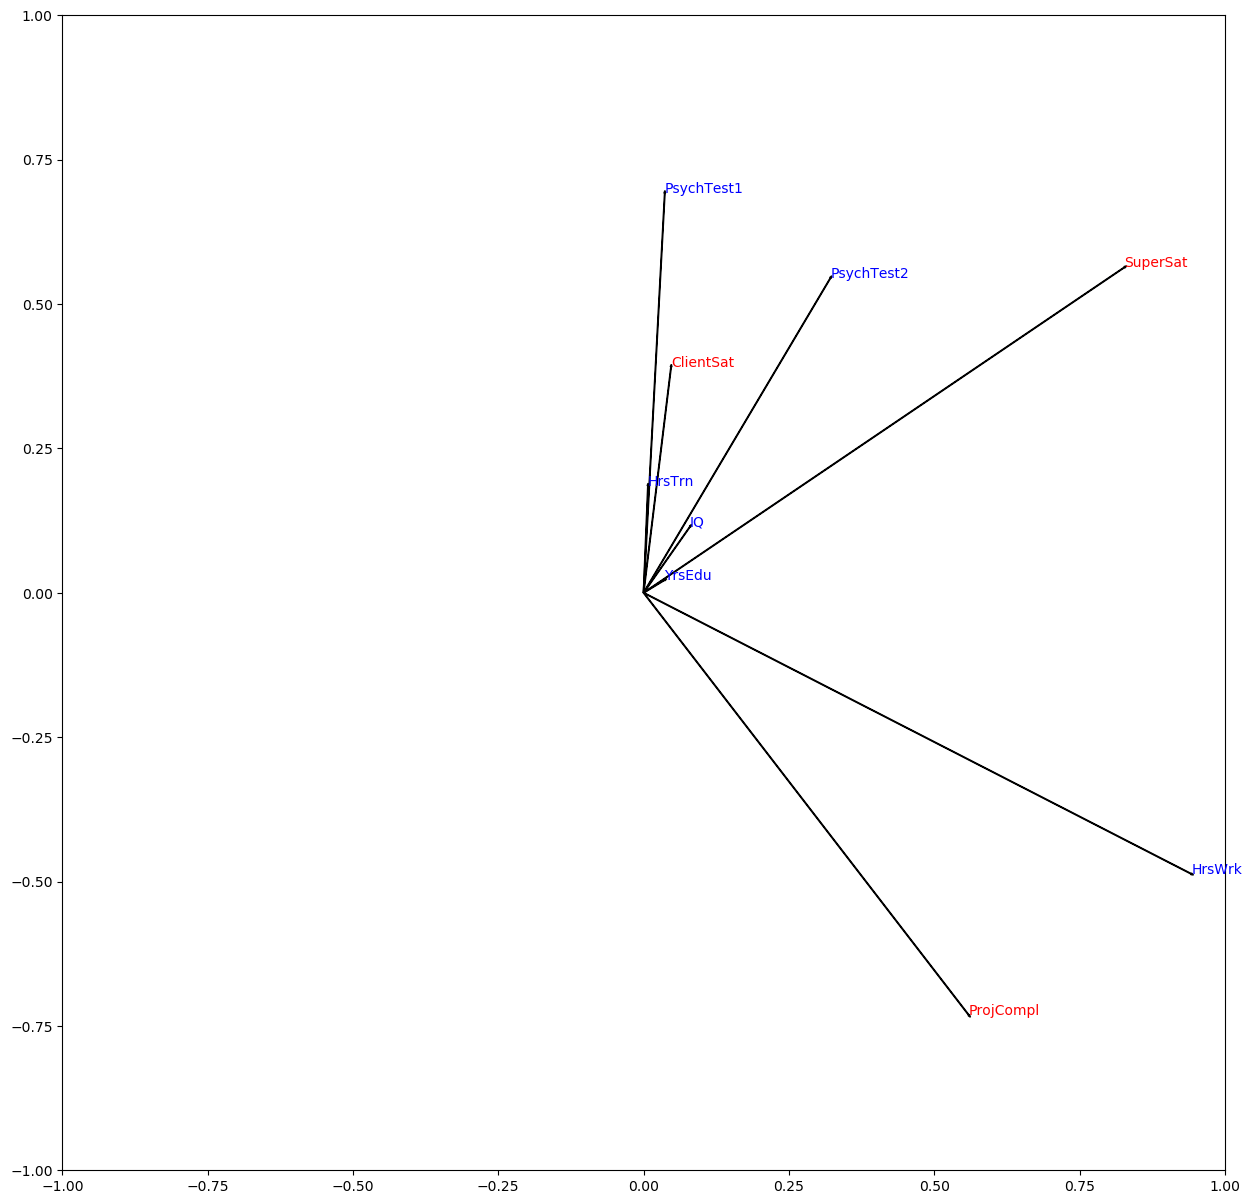

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Obtain the rotation matrices
xrot = my_cca.x_rotations_
yrot = my_cca.y_rotations_

# Put them together in a numpy matrix
xyrot = np.vstack((xrot,yrot))

nvariables = xyrot.shape[0]

plt.figure(figsize=(15, 15))
plt.xlim((-1,1))
plt.ylim((-1,1))

# Plot an arrow and a text label for each variable
for var_i in range(nvariables):
  x = xyrot[var_i,0]
  y = xyrot[var_i,1]

  plt.arrow(0,0,x,y)
  plt.text(x,y,data.columns[var_i], color='red' if var_i >= 6 else 'blue')

plt.show()